In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D


In [245]:
file_path = '2019.csv'
df = pd.read_csv(file_path)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [246]:
df["Country or region"]

0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 156, dtype: object

In [247]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [248]:
df = df.drop(['Overall rank', 'Country or region',"Score"], axis=1)

In [249]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

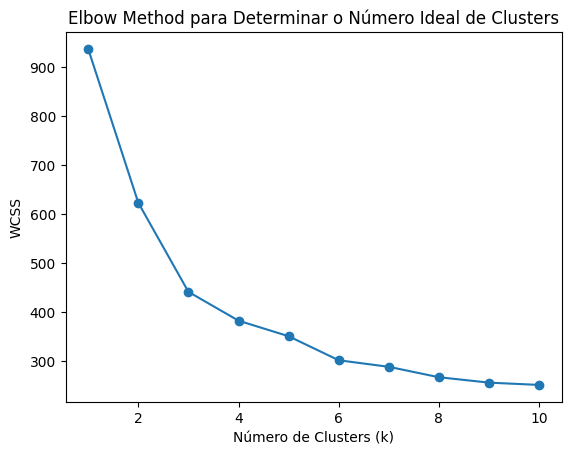

In [250]:
# Lista para armazenar a WCSS para cada valor de k
wcss = []

# Executar o K-Means para valores de k de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico WCSS vs. número de clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method para Determinar o Número Ideal de Clusters')
plt.show()

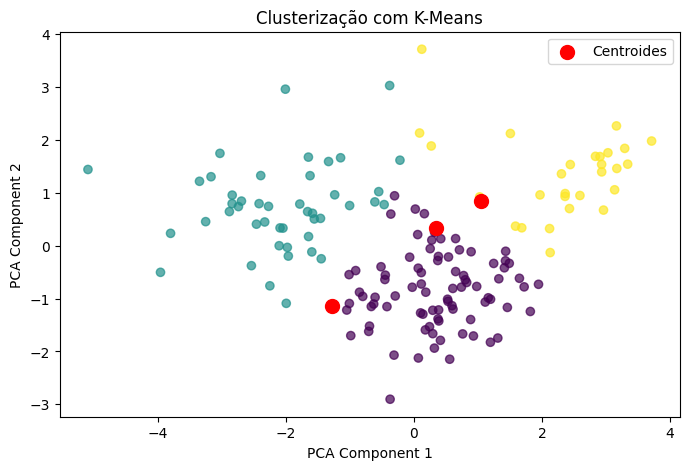

Índice de Silhueta para K-Means com k=3: 0.34


In [251]:
# Definir o número de clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar o modelo K-Means aos dados
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Reduzir a dimensionalidade para visualização
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
labels = kmeans.fit_predict(X_scaled)


# Visualizar os clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroides')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusterização com K-Means')
plt.legend()
plt.show()

# Avaliar com o índice de silhueta
silhouette_avg_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"Índice de Silhueta para K-Means com k={k}: {silhouette_avg_kmeans:.2f}")

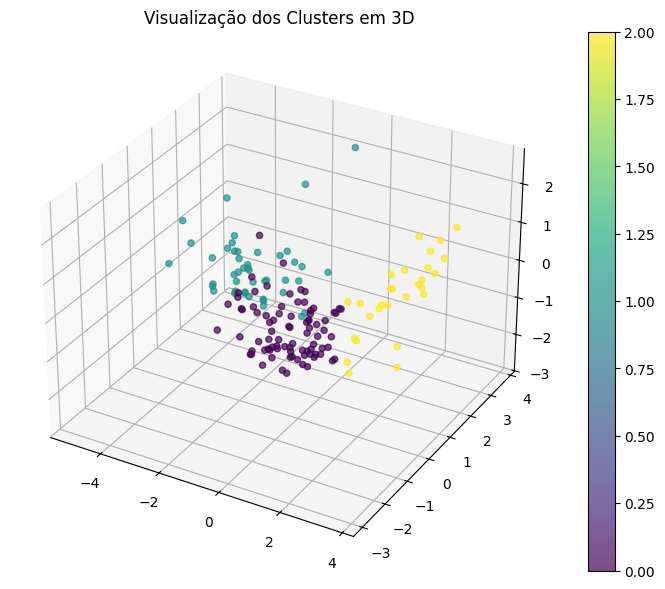

In [252]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', alpha=0.7)

plt.title('Visualização dos Clusters em 3D')
plt.colorbar(sc)

plt.show()

In [253]:
best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Testar várias combinações de eps e min_samples
for eps in np.arange(1.0, 3.5, 0.5):  # Ajuste o intervalo conforme necessário
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(X_scaled)

        # Filtrar clusters sem outliers
        mask = clusters_dbscan != -1
        unique_labels = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)

        # Verificar se há mais de um cluster e calcular o índice de silhueta
        if unique_labels > 1 and mask.sum() > 1:
            score = silhouette_score(X_scaled[mask], clusters_dbscan[mask])
            print(f"eps={eps}, min_samples={min_samples} => Índice de Silhueta: {score:.2f}")

            # Armazenar a melhor combinação
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Melhores parâmetros: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
print(f"Melhor Índice de Silhueta: {best_score:.2f}")

eps=1.0, min_samples=2 => Índice de Silhueta: 0.13
eps=1.0, min_samples=3 => Índice de Silhueta: 0.30
eps=1.0, min_samples=4 => Índice de Silhueta: 0.32
eps=1.0, min_samples=5 => Índice de Silhueta: 0.22
Melhores parâmetros: eps=1.0, min_samples=4
Melhor Índice de Silhueta: 0.32


Criar uma nova coluna com o "rótulo" gerado, para saber quais países foram classificados juntos e assim ter uma noção dos parâmetros importantes

In [254]:
file_path = '2019.csv'
df2 = pd.read_csv(file_path)


df2["Predição"] = clusters_kmeans
df2.head()



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Predição
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


In [255]:
df2.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Predição
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,1
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,1


Ao observar os resultados gerados, é possível conclcuir que os 3 fatores mais importantes para a felicidade do país, são renda per capita, suporte social e expectativa de vida saudável